<a href="https://colab.research.google.com/github/irasin/pytroch_test/blob/master/081215.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision
!wget https://github.com/lucidfrontier45/PyTorch-Book/raw/master/data/taco_and_burrito.tar.gz
!tar -zxvf taco_and_burrito.tar.gz

--2018-12-15 03:29:56--  https://github.com/lucidfrontier45/PyTorch-Book/raw/master/data/taco_and_burrito.tar.gz
Resolving github.com (github.com)... 140.82.118.4, 140.82.118.3
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lucidfrontier45/PyTorch-Book/master/data/taco_and_burrito.tar.gz [following]
--2018-12-15 03:29:56--  https://raw.githubusercontent.com/lucidfrontier45/PyTorch-Book/master/data/taco_and_burrito.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15292798 (15M) [application/octet-stream]
Saving to: ‘taco_and_burrito.tar.gz.2’

taco_and_burrito.ta 100%[===================>]  14.58M  73.8MB/s    in 0.2s    

2018-12-15 03:29:57 

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

In [0]:
train_imgs = ImageFolder('taco_and_burrito/train/', transform=transforms.Compose([transforms.RandomCrop(224), transforms.ToTensor()]))
test_imgs = ImageFolder('taco_and_burrito/test/', transform=transforms.Compose([transforms.CenterCrop(224), transforms.ToTensor()]))
train_loader = DataLoader(train_imgs, batch_size=32, shuffle=True)
test_loader = DataLoader(test_imgs, batch_size=32, shuffle=False)

In [0]:
from torchvision.models import resnet18

In [0]:
net = resnet18(pretrained=True)

In [0]:
for p in net.parameters():
    p.requires_grad = False

fc_input_dim = net.fc.in_features
net.fc = nn.Linear(fc_input_dim, 2)

In [0]:
def eval_net(net, dataloader, device):
    net = net.to(device)
    net.eval()
    y_reals = []
    y_preds = []
    for x, y in dataloader:
        x = x.to(device)
        y = y.to(device)
        with torch.no_grad():
            _, y_pred = net(x).max(1)
        y_reals.append(y)
        y_preds.append(y_pred)
    y_preds = torch.cat(y_preds)
    y_reals = torch.cat(y_reals)
    acc = (y_preds == y_reals).float().sum() / len(y_preds)
    return acc.item()


In [0]:
def train_net(net,
              train_loader, 
              test_loader, 
              only_fc=True,
              optimizer=optim.Adam, 
              criterion=nn.CrossEntropyLoss(),
              epoch=10,
              device='cpu'):
    net = net.to(device)
    if only_fc:
        opt = optimizer(net.fc.parameters())
    else:
        opt = optimizer(net.parameters())
    
    train_loss_log = []
    train_acc_log = []
    val_acc_log = []
    for i in range(epoch):
        net.train()
        y_reals = []
        y_preds = []
        for x, y in tqdm(train_loader):
            x = x.to(device)
            y = y.to(device)
            h = net(x)
            loss = criterion(h, y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            train_loss_log.append(loss.item())
            _, y_pred = h.max(1)
            y_preds.append(y_pred)
            y_reals.append(y)
        y_preds = torch.cat(y_preds)
        y_reals = torch.cat(y_reals)
        acc = (y_preds == y_reals).float().sum() / len(y_preds)
        train_acc_log.append(acc.item())
        val_acc_log.append(eval_net(net, test_loader, device))
        print(f'{i}th epoch: train_acc:{train_acc_log[-1]}, val_acc:{val_acc_log[-1]}')

    plt.plot(train_loss_log, c='b', label='train_loss_log')
    plt.title('train loss')
    plt.legend()
    plt.show()

    plt.plot(train_acc_log, c='b', label='train_acc_log')
    plt.plot(val_acc_log, c='r', label='val_acc_log') 
    plt.title('accuracy')
    plt.legend()
    plt.show()

  0%|          | 0/23 [00:00<?, ?it/s]

0th epoch: train_acc:0.567415714263916, val_acc:0.7666667103767395


  0%|          | 0/23 [00:00<?, ?it/s]

1th epoch: train_acc:0.7387640476226807, val_acc:0.8000000715255737


  0%|          | 0/23 [00:00<?, ?it/s]

2th epoch: train_acc:0.8146067261695862, val_acc:0.8166667222976685


  0%|          | 0/23 [00:00<?, ?it/s]

3th epoch: train_acc:0.8258426785469055, val_acc:0.8500000238418579


  0%|          | 0/23 [00:00<?, ?it/s]

4th epoch: train_acc:0.8202247023582458, val_acc:0.8333333730697632


  0%|          | 0/23 [00:00<?, ?it/s]

5th epoch: train_acc:0.8328651785850525, val_acc:0.8000000715255737


  0%|          | 0/23 [00:00<?, ?it/s]

6th epoch: train_acc:0.8426966667175293, val_acc:0.8500000238418579


  0%|          | 0/23 [00:00<?, ?it/s]

7th epoch: train_acc:0.8441011309623718, val_acc:0.8000000715255737


  0%|          | 0/23 [00:00<?, ?it/s]

8th epoch: train_acc:0.8553370833396912, val_acc:0.8666667342185974


  0%|          | 0/23 [00:00<?, ?it/s]

9th epoch: train_acc:0.858146071434021, val_acc:0.8666667342185974


  0%|          | 0/23 [00:00<?, ?it/s]

10th epoch: train_acc:0.8511236310005188, val_acc:0.8000000715255737


  0%|          | 0/23 [00:00<?, ?it/s]

11th epoch: train_acc:0.8441011309623718, val_acc:0.7500000596046448


  0%|          | 0/23 [00:00<?, ?it/s]

12th epoch: train_acc:0.8707865476608276, val_acc:0.8666667342185974


  0%|          | 0/23 [00:00<?, ?it/s]

13th epoch: train_acc:0.8707865476608276, val_acc:0.8666667342185974


  0%|          | 0/23 [00:00<?, ?it/s]

14th epoch: train_acc:0.858146071434021, val_acc:0.8666667342185974


  0%|          | 0/23 [00:00<?, ?it/s]

15th epoch: train_acc:0.882022500038147, val_acc:0.8166667222976685


  0%|          | 0/23 [00:00<?, ?it/s]

16th epoch: train_acc:0.8792135119438171, val_acc:0.8833333849906921


  0%|          | 0/23 [00:00<?, ?it/s]

17th epoch: train_acc:0.8637640476226807, val_acc:0.8500000238418579


  0%|          | 0/23 [00:00<?, ?it/s]

18th epoch: train_acc:0.8904494643211365, val_acc:0.8500000238418579


100%|██████████| 23/23 [00:06<00:00,  3.65it/s]


19th epoch: train_acc:0.8665730357170105, val_acc:0.8000000715255737


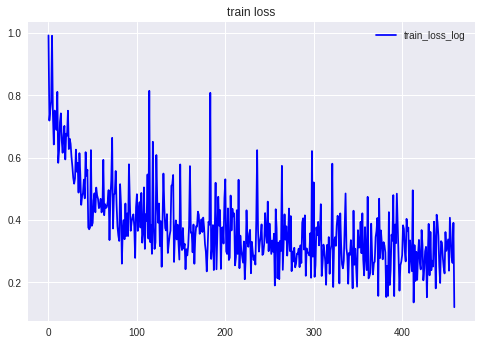

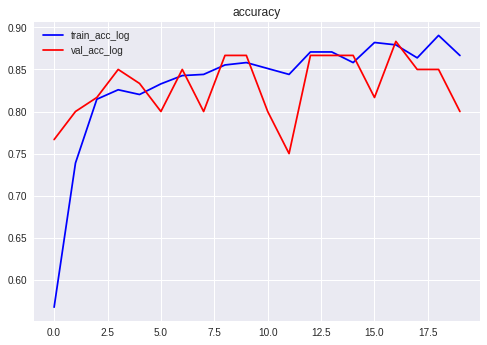

In [26]:
train_net(net, train_loader, test_loader, epoch=20, device='cuda:0')